In [5]:
import numpy as np
from optimal_control.evaluation.test_cases.discrete.gas.discrete_gas_storage import DiscreteGasStorageTestCase
from optimal_control.solvers.solver import optimal_control_solution
from optimal_control.solvers.discrete import RegressionValueFunction

In [6]:
tc = DiscreteGasStorageTestCase()

In [7]:
te = tc.test_environment(T=1.0, J=31, y_max=8,
                         h_max=1, h_min=-1,
                         interest_rate=0.1, volatility=0.2,
                         mean_revision=0.25, mean=2.5,
                         jump_rate=2, jump_mean=6, jump_std=2,
                         log_utility=False
                        )

In [8]:
X_tr = te.price_model.sample_paths(te.example.T, te.example.n_time_steps, 1_000_000, ("dirac", 6.0))
X_te = te.price_model.sample_paths(te.example.T, te.example.n_time_steps, 1_000_000, ("dirac", 6.0))

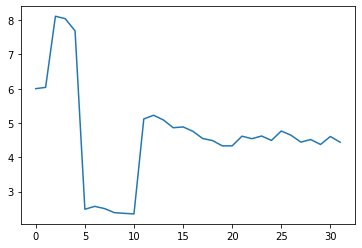

In [9]:
import matplotlib.pyplot as plt
plt.plot(X_tr[np.random.randint(1_000_000)])

# Lower Bounds different setups

In [10]:
vf = tc.value_function(te, deg=0, max_depth=0)
vf.fit(X_tr)
sol, res = optimal_control_solution(X_te, 4, vf, te.example)
res.mean()

31/31 ->

32.661828694208445

In [16]:
vf = tc.value_function(te, deg=1, max_depth=0)
vf.fit(X_tr)
sol, res = optimal_control_solution(X_te, 4, vf, te.example)
res.mean()

32.644114059277186

In [17]:
vf = tc.value_function(te, deg=2, max_depth=0)
vf.fit(X_tr)
sol, res = optimal_control_solution(X_te, 4, vf, te.example)
res.mean()

32.96810381288905

In [18]:
vf = tc.value_function(te, deg=3, max_depth=0)
vf.fit(X_tr)
sol, res = optimal_control_solution(X_te, 4, vf, te.example)
res.mean()

32.94533430269743

In [19]:
vf = tc.value_function(te, deg=1, max_depth=2)
vf.fit(X_tr)
sol, res = optimal_control_solution(X_te, 4, vf, te.example)
res.mean()

32.98820259504541

In [ ]:
vf = tc.value_function(te, deg=2, max_depth=2)
vf.fit(X_tr)
sol, res = optimal_control_solution(X_te, 4, vf, te.example)
res.mean()

In [ ]:
vf = tc.value_function(te, deg=1, max_depth=1)
vf.fit(X_tr)
sol, res = optimal_control_solution(X_te, 4, vf, te.example)
res.mean()

In [ ]:
vf = tc.value_function(te, deg=1, max_depth=1)
vf.fit(X_tr)
sol, res = optimal_control_solution(X_te, 4, vf, te.example)
res.mean()

In [ ]:
res.std()/np.sqrt(1_000_000)